In [ ]:
!pip install fancyimpute

Total number of rows in the original dataset: 63797
Total number of columns in the original dataset: 7
Number of columns dropped: 3
Number of missing values (NA, NULL, or empty strings) in numerical columns before imputation: 267

Total number of rows after dropping rows with string values in numeric columns: 63708

Imputed Values for Numerical Columns:
       magnitude  Proximity-distance    rotation
0      -0.328058           -0.164029  147.593444
1      -0.298873           -0.149437  143.567311
2      -0.337056           -0.168528  141.635184
3      -0.276304           -0.138152  134.210179
4      -0.218913           -0.109456  141.802436
...          ...                 ...         ...
63703  84.151791           42.075895  166.772612
63704  70.248321           35.124161  161.096560
63705  64.969654           32.484827  178.663572
63706  67.763566           33.881783   86.554587
63707  39.583403           19.791702  158.411672

[63708 rows x 3 columns]

Total number of rows in the c

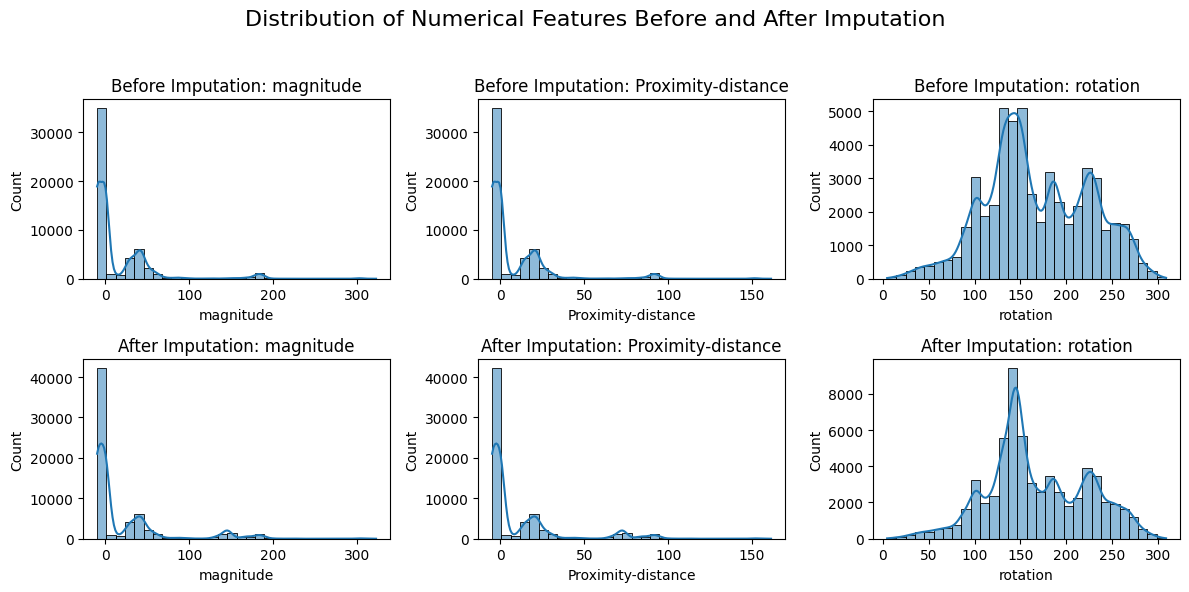

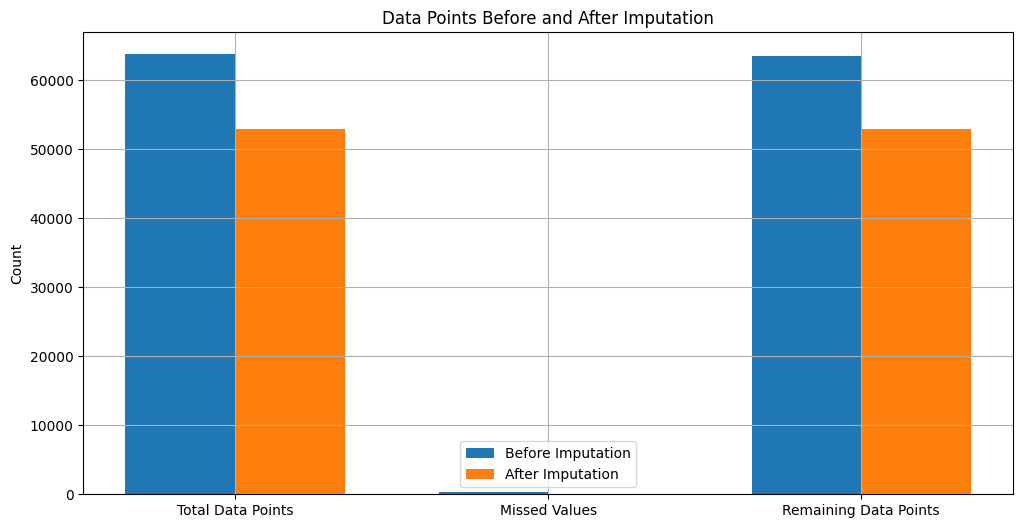


Number of rows in the training dataset: 42317
Number of rows in the testing dataset: 10580
Percentage of rows in the training dataset: 80.00%
Percentage of rows in the testing dataset: 20.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from fancyimpute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('agg2.csv')

# Print the total number of rows and columns in the original dataset
total_rows_before, total_columns_before = df.shape
print(f"Total number of rows in the original dataset: {total_rows_before}")
print(f"Total number of columns in the original dataset: {total_columns_before}")

# Drop the 'CollectionFolder', 'Date', 'Time' columns
columns_to_drop = ['CollectionFolder', 'Date', 'Time']
df = df.drop(columns=columns_to_drop, axis=1)

# Print the number of columns dropped
columns_dropped = len(columns_to_drop)
print(f"Number of columns dropped: {columns_dropped}")

# Check if 'app' is present in the columns
if 'app' in df.columns:
    # Drop rows where 'app' is empty or contains only whitespace
    df = df[df['app'].str.strip() != ""]

    # Count missing values in numerical columns before imputation
    missing_values_before_numeric = df.select_dtypes(include=['number']).isnull().sum().sum()
    print(f"Number of missing values (NA, NULL, or empty strings) in numerical columns before imputation: {missing_values_before_numeric}")

    # Check if there are any string values in numeric columns, drop those rows
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    df = df.dropna(subset=numeric_columns)

    # Print the total number of rows in the cleaned dataset after dropping rows
    total_rows_after_drop = len(df)
    print(f"\nTotal number of rows after dropping rows with string values in numeric columns: {total_rows_after_drop}")

    # Impute missing values in numerical columns using IterativeImputer from fancyimpute
    # Review and adjust IterativeImputer parameters
    imputer_numeric = IterativeImputer(max_iter=100, random_state=42)  # Adjust max_iter as needed
    df_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(df[numeric_columns]), columns=numeric_columns)
    df[numeric_columns] = df_imputed_numeric

    # Print the imputed values for numerical columns
    print("\nImputed Values for Numerical Columns:")
    print(df_imputed_numeric)

    # Drop rows where 'app' is empty after imputation
    df = df[df['app'].notnull()]

    # Print the total number of rows after dropping rows with empty 'app' after imputation
    total_rows_after_imputation = len(df)
    print(f"\nTotal number of rows in the cleaned dataset after imputation and dropping rows with empty 'app': {total_rows_after_imputation}")

    # Count missing values in numerical columns after imputation
    missing_values_after_numeric = df_imputed_numeric.isnull().sum().sum()
    print(f"Number of missing values (NA, NULL, or empty strings) in numerical columns after imputation: {missing_values_after_numeric}")

    print("\n")

    # Plot histograms for numerical features before and after imputation
    def plot_histograms(df_before, df_after):
        plt.figure(figsize=(12, 6))
        plt.suptitle('Distribution of Numerical Features Before and After Imputation', fontsize=16)

        # Plot histograms for each numerical column before imputation
        for i, column in enumerate(df_before.columns, 1):
            plt.subplot(2, len(df_before.columns), i)
            sns.histplot(df_before[column], bins=30, kde=True)
            plt.title(f'Before Imputation: {column}')

        # Plot histograms for each numerical column after imputation
        for i, column in enumerate(df_after.columns, 1):
            plt.subplot(2, len(df_after.columns), i + len(df_before.columns))
            sns.histplot(df_after[column], bins=30, kde=True)
            plt.title(f'After Imputation: {column}')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    # Plot histograms for numerical features before and after imputation
    plot_histograms(df[numeric_columns], df_imputed_numeric)

    print("\n")

    # Plot the total number of data points, missed values data points, and remaining data points before and after imputation
    labels = ['Total Data Points', 'Missed Values', 'Remaining Data Points']
    counts_before_imputation = [total_rows_before, missing_values_before_numeric, total_rows_before - missing_values_before_numeric]
    counts_after_imputation = [total_rows_after_imputation, missing_values_after_numeric,
                               total_rows_after_imputation - missing_values_after_numeric]

    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35
    x = range(len(labels))

    rects1 = ax.bar(x, counts_before_imputation, width, label='Before Imputation')
    rects2 = ax.bar([i + width for i in x], counts_after_imputation, width, label='After Imputation')

    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(labels)
    ax.legend()

    # Add labels, title, and grid
    ax.set_ylabel('Count')
    ax.set_title('Data Points Before and After Imputation')
    ax.grid(True)

    # Display the bar chart
    plt.show()

    # Check if 'app' is present in the columns
    if 'app' in df.columns:
        # Specify the features (X) and the target variable (y)
        X = df.drop('app', axis=1)
        y = df['app']

        # Split the data into training and testing sets (80% for training, 20% for testing)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Print the number of rows in the training dataset
        num_rows_train = len(X_train)
        print(f"\nNumber of rows in the training dataset: {num_rows_train}")

        # Print the number of rows in the testing dataset
        num_rows_test = len(X_test)
        print(f"Number of rows in the testing dataset: {num_rows_test}")

        # Calculate the percentage of rows in the training dataset
        percentage_rows_train = (num_rows_train / total_rows_after_imputation) * 100
        print(f"Percentage of rows in the training dataset: {percentage_rows_train:.2f}%")

        # Calculate the percentage of rows in the testing dataset
        percentage_rows_test = (num_rows_test / total_rows_after_imputation) * 100
        print(f"Percentage of rows in the testing dataset: {percentage_rows_test:.2f}%")

        # Optionally, you can save these splits to separate files
        train_data = pd.concat([X_train, y_train], axis=1)
        test_data = pd.concat([X_test, y_test], axis=1)

        train_data.to_csv('training_data.csv', index=False)
        test_data.to_csv('test_data.csv', index=False)
    else:
        print("Column 'app' not found in the dataset.")
else:
    print("Column 'app' not found in the dataset.")


In [ ]:
# Read a file already present in Colab
file_path = 'training_data.csv'

with open(file_path, 'r') as file:
    file_contents = file.read()

# Print the file contents
print(file_contents)


magnitude,Proximity-distance,rotation,app
37.53635471425709,18.768177357128547,116.9755480528282,TextAPP
-9.734037655,-4.867018827,259.5031045815158,GameAPP
-9.80991962,-4.90495981,181.4019393481814,VideoAPP
27.829111960083424,13.914555980041712,193.0745047896007,GameAPP
-0.462437143,-0.231218572,124.24152504160683,TextAPP
0.065809234,0.032904617,124.37997420049838,GameAPP
-9.809576773,-4.904788387,160.7738524,TextAPP
-0.291148885,-0.145574443,104.26025245496812,GameAPP
-9.626527394,-4.813263697,157.74840498602796,TextAPP
-9.804110504,-4.902055252,94.95175268465336,VideoAPP
-0.016855433,-0.008427717,131.8477960724973,GameAPP
21.43160669721562,10.71580334860781,251.00595816494507,GameAPP
28.69500824367644,14.347504121838217,134.84694697758022,TextAPP
-9.766298764,-4.883149382,228.31048289208735,TextAPP
-9.647553515,-4.823776757,176.14701936864722,GameAPP
-9.756093698,-4.878046849,166.0565373335189,GameAPP
-0.137075011,-0.068537506,150.9061034616557,GameAPP
29.84893088166079,14.924465440

In [ ]:
# Read a file already present in Colab
file_path = 'test_data.csv'

with open(file_path, 'r') as file:
    file_contents = file.read()

# Print the file contents
print(file_contents)

magnitude,Proximity-distance,rotation,app
-9.809830834,-4.904915417,227.53607384568855,VideoAPP
-0.326054271,-0.163027135,137.89229323633103,GameAPP
-9.622378351,-4.811189175,202.2537436967277,GameAPP
-9.809026979,-4.904513489,221.71495352635907,GameAPP
44.92039568,22.46019783937545,233.9990364432905,GameAPP
-0.010465602,-0.005232801,153.15694331550546,TextAPP
-1.425421376,-0.712710688,121.95816007256036,VideoAPP
-7.761529788,-3.880764894,159.2742995313891,TextAPP
13.824785735668373,6.912392867834186,220.68339311625328,GameAPP
39.20537664980501,19.602688324902505,211.3689096808042,GameAPP
45.27873524,22.63936761985535,204.91877867852384,GameAPP
0.087775819,0.04388791,141.4869802637373,GameAPP
-9.70914048,-4.85457024,48.55275920384962,GameAPP
181.9801299294542,90.99006496,147.0819852900688,GameAPP
41.93913181604286,20.96956590802143,226.24363586173476,GameAPP
-0.245661926,-0.122830963,151.53738800505738,GameAPP
25.552798481102503,12.776399240551251,158.3230696,TextAPP
-0.596064698,-0.29

In [ ]:
import pandas as pd

# Load the testing dataset
testing_data = pd.read_csv('test_data.csv')

# Drop the 'app' column
testing_data_no_label = testing_data.drop('app', axis=1)

# Save the testing dataset without the 'app' column
testing_data_no_label.to_csv('testing_data_NoLabel.csv', index=False)

In [ ]:
import pandas as pd

# Load the testing dataset
testing_data = pd.read_csv('test_data.csv')

# Extract the 'app' column as labels
test_labels_actual = testing_data[['app']]

# Save the labels to 'Test_Labels_Actual.csv'
test_labels_actual.to_csv('Test_Labels_Actual.csv', index=False, header=False)

# Drop the 'app' column from the original dataset
testing_data_no_label = testing_data.drop('app', axis=1)

# Save the testing dataset without the 'app' column to 'testing_data_NoLabel.csv'
testing_data_no_label.to_csv('testing_data_NoLabel.csv', index=False)


In [ ]:
import pandas as pd

# Load the training data
df = pd.read_csv('training_data.csv')

# Ensure there are columns in the dataframe
if not df.empty:
    # Split the last column into a separate file (TrainingLabel.csv)
    last_column_name = df.columns[-1]
    training_label = df[[last_column_name]]
    training_label.to_csv('TrainingLabel.csv', index=False)

    # Save the rest of the columns (excluding the last column) into a separate file (TrainingDataSplit.csv)
    training_data_split = df.iloc[:, :-1]  # Exclude the last column
    training_data_split.to_csv('TrainingDataSplit.csv', index=False)

    print("Files saved successfully.")
else:
    print("No columns found in the dataset.")


Files saved successfully.


In [ ]:
import pandas as pd

# Read the CSV file with headers
input_file = 'TrainingDataSplit.csv'
df = pd.read_csv(input_file)

# Do some processing on the dataframe if needed

# Save the dataframe to a new CSV file without headers
output_file = 'Training_Data.csv'
df.to_csv(output_file, index=False, header=False)

In [ ]:
import pandas as pd

# Read the CSV file with headers
input_file = 'TrainingLabel.csv'
df = pd.read_csv(input_file)

# Do some processing on the dataframe if needed

# Save the dataframe to a new CSV file without headers
output_file = 'Training_Label.csv'
df.to_csv(output_file, index=False, header=False)

In [ ]:
import pandas as pd

# Read the CSV file with headers
input_file = 'testing_data_NoLabel.csv'
df = pd.read_csv(input_file)

# Do some processing on the dataframe if needed

# Save the dataframe to a new CSV file without headers
output_file = 'Test_Data.csv'
df.to_csv(output_file, index=False, header=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



 Confusion Matrix (SVM - Training):

[[27212   642   366]
 [ 5470  1463     8]
 [ 5475     2  1679]]

Training Accuracy (SVM): 71.73%


Accuracy Rate for SVM (Test): 71.27%


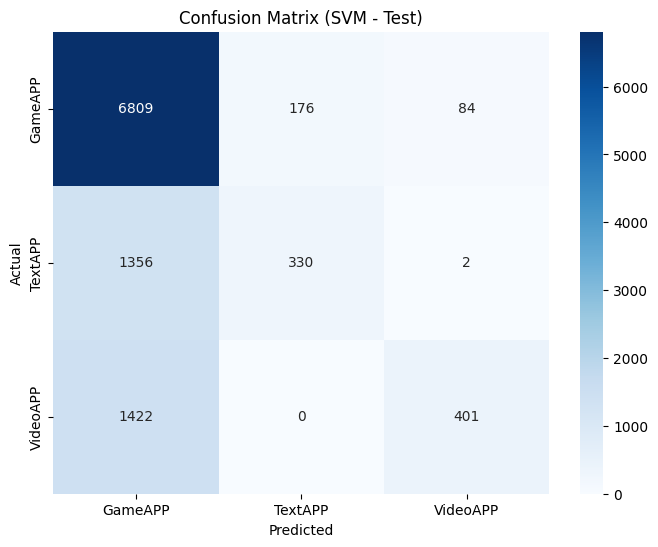


Comparison of Actual and Predicted Test Labels (SVM)
Actual,Predicted_SVM
VideoAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,GameAPP
VideoAPP,GameAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
TextAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
VideoAPP,GameAPP
TextAPP,GameAPP
VideoAPP,GameAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data, training labels, and test data from CSV files
train_data = pd.read_csv('Training_Data.csv', header=None)
train_labels = pd.read_csv('Training_Label.csv', header=None).values.ravel()
test_data = pd.read_csv('Test_Data.csv', header=None)

# Generate generic column names
num_columns = train_data.shape[1]
column_names = [f'Feature_{i}' for i in range(1, num_columns + 1)]

# Assign column names to the training data
train_data.columns = column_names

# Handle missing values by replacing them with NaN
train_data.replace(1.00000000000000e+99, np.nan, inplace=True)
test_data.replace(1.00000000000000e+99, np.nan, inplace=True)

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform training data
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=column_names)

# Transform test data and explicitly specify the columns
test_data = pd.DataFrame(imputer.transform(test_data), columns=column_names)

# Create and train the SVM classifier with radial kernel
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(train_data, train_labels)

# Make predictions on the test data
predictions_svm = svm_classifier.predict(test_data)

# Display confusion matrix for the classification prediction on training data
conf_matrix_svm_train = confusion_matrix(train_labels, svm_classifier.predict(train_data))
print("\n Confusion Matrix (SVM - Training):\n")
print(conf_matrix_svm_train)

# Calculate and print the accuracy on the training data as a percentage
train_predictions_svm = svm_classifier.predict(train_data)
accuracy_svm_train = accuracy_score(train_labels, train_predictions_svm)
accuracy_percentage_svm_train = accuracy_svm_train * 100
print("\nTraining Accuracy (SVM):", f"{accuracy_percentage_svm_train:.2f}%\n")

# Save the predictions to a CSV file
output_df_svm = pd.DataFrame(predictions_svm, columns=['Predictions'])
output_df_svm.to_csv('TestLabelPrediction_SVM.csv', index=False)

# Load the actual test labels for comparison
test_labels_actual_svm = pd.read_csv('Test_Labels_Actual.csv', header=None).values.ravel()

# Load the predictions from the SVM model
predictions_svm = pd.read_csv('TestLabelPrediction_SVM.csv')['Predictions']

# Compare predictions with actual test labels
comparison_svm = pd.DataFrame({'Actual': test_labels_actual_svm, 'Predicted_SVM': predictions_svm})

# Calculate accuracy for the SVM model
accuracy_svm = accuracy_score(test_labels_actual_svm, predictions_svm)

# Print accuracy rate
print("\nAccuracy Rate for SVM (Test):", f"{accuracy_svm * 100:.2f}%")

# Plot Confusion Matrix for test
conf_matrix_svm = confusion_matrix(test_labels_actual_svm, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels_actual_svm), yticklabels=np.unique(test_labels_actual_svm))
plt.title('Confusion Matrix (SVM - Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the comparison DataFrame to a CSV file
comparison_svm.to_csv('Comparison_SVM.csv', index=False)

# Now read and print the content of the output CSV file
with open('Comparison_SVM.csv', 'r') as file:
    file_content_svm = file.read()

print("\nComparison of Actual and Predicted Test Labels (SVM)")
print(file_content_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



 Confusion Matrix (Decision Tree - Training):

[[28220     0     0]
 [    0  6941     0]
 [    0     0  7156]]

Training Accuracy (Decision Tree): 100.00%


Accuracy Rate for Decision Tree (Test): 75.70%


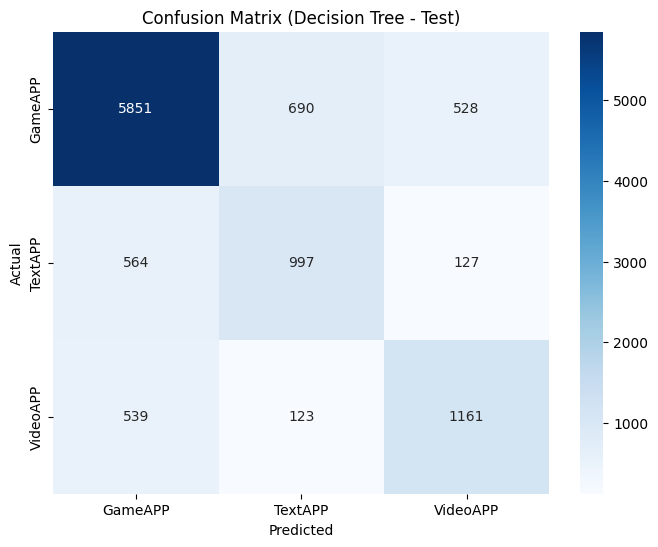


Comparison of Actual and Predicted Test Labels (Decision Tree)
Actual,Predicted_DT
VideoAPP,TextAPP
GameAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,GameAPP
VideoAPP,GameAPP
TextAPP,TextAPP
GameAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,TextAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,TextAPP
GameAPP,GameAPP
VideoAPP,TextAPP
GameAPP,GameAPP
VideoAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,VideoAPP
GameAPP,TextAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
VideoAPP,GameAPP
TextAPP,TextAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data, training labels, and test data from CSV files
train_data = pd.read_csv('Training_Data.csv', header=None)
train_labels = pd.read_csv('Training_Label.csv', header=None).values.ravel()
test_data = pd.read_csv('Test_Data.csv', header=None)

# Generate generic column names
num_columns = train_data.shape[1]
column_names = [f'Feature_{i}' for i in range(1, num_columns + 1)]

# Assign column names to the training data
train_data.columns = column_names

# Handle missing values by replacing them with NaN
train_data.replace(1.00000000000000e+99, np.nan, inplace=True)
test_data.replace(1.00000000000000e+99, np.nan, inplace=True)

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform training data
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=column_names)

# Transform test data and explicitly specify the columns
test_data = pd.DataFrame(imputer.transform(test_data), columns=column_names)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_data, train_labels)

# Make predictions on the test data
predictions_dt = dt_classifier.predict(test_data)

# Display confusion matrix for the classification prediction on training data
conf_matrix_dt_train = confusion_matrix(train_labels, dt_classifier.predict(train_data))
print("\n Confusion Matrix (Decision Tree - Training):\n")
print(conf_matrix_dt_train)

# Calculate and print the accuracy on the training data as a percentage
train_predictions_dt = dt_classifier.predict(train_data)
accuracy_dt_train = accuracy_score(train_labels, train_predictions_dt)
accuracy_percentage_dt_train = accuracy_dt_train * 100
print("\nTraining Accuracy (Decision Tree):", f"{accuracy_percentage_dt_train:.2f}%\n")

# Save the predictions to a CSV file
output_df_dt = pd.DataFrame(predictions_dt, columns=['Predictions'])
output_df_dt.to_csv('TestLabelPrediction_DT.csv', index=False)

# Load the actual test labels for comparison
test_labels_actual_dt = pd.read_csv('Test_Labels_Actual.csv', header=None).values.ravel()

# Load the predictions from the Decision Tree model
predictions_dt = pd.read_csv('TestLabelPrediction_DT.csv')['Predictions']

# Compare predictions with actual test labels
comparison_dt = pd.DataFrame({'Actual': test_labels_actual_dt, 'Predicted_DT': predictions_dt})

# Calculate accuracy for the Decision Tree model
accuracy_dt = accuracy_score(test_labels_actual_dt, predictions_dt)

# Print accuracy rate
print("\nAccuracy Rate for Decision Tree (Test):", f"{accuracy_dt * 100:.2f}%")

# Plot Confusion Matrix for test
conf_matrix_dt = confusion_matrix(test_labels_actual_dt, predictions_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels_actual_dt), yticklabels=np.unique(test_labels_actual_dt))
plt.title('Confusion Matrix (Decision Tree - Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the comparison DataFrame to a CSV file
comparison_dt.to_csv('Comparison_DT.csv', index=False)

# Now read and print the content of the output CSV file
with open('Comparison_DT.csv', 'r') as file:
    file_content_dt = file.read()

print("\nComparison of Actual and Predicted Test Labels (Decision Tree)")
print(file_content_dt)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



 Confusion Matrix (Random Forest - Training):

[[28220     0     0]
 [    2  6939     0]
 [    0     0  7156]]

Training Accuracy (Random Forest): 100.00%


Accuracy Rate for Random Forest (Test): 80.74%


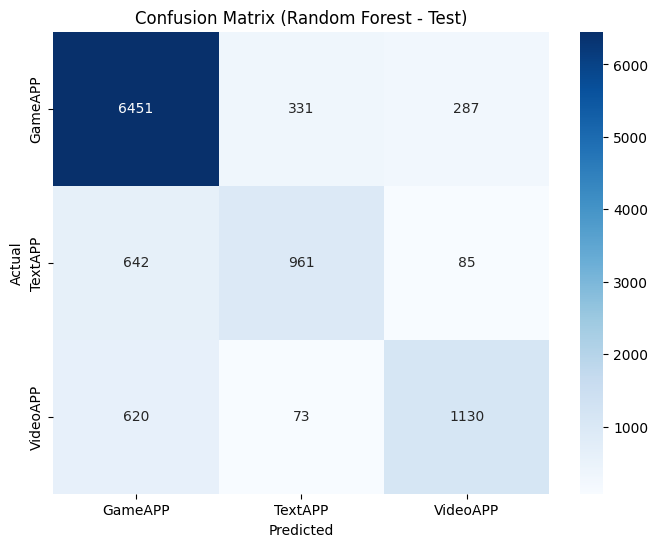


Comparison of Actual and Predicted Test Labels (Random Forest)
Actual,Predicted_RF
VideoAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,GameAPP
VideoAPP,GameAPP
TextAPP,TextAPP
GameAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
VideoAPP,GameAPP
TextAPP,TextAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data, training labels, and test data from CSV files
train_data = pd.read_csv('Training_Data.csv', header=None)
train_labels = pd.read_csv('Training_Label.csv', header=None).values.ravel()
test_data = pd.read_csv('Test_Data.csv', header=None)

# Generate generic column names
num_columns = train_data.shape[1]
column_names = [f'Feature_{i}' for i in range(1, num_columns + 1)]

# Assign column names to the training data
train_data.columns = column_names

# Handle missing values by replacing them with NaN
train_data.replace(1.00000000000000e+99, np.nan, inplace=True)
test_data.replace(1.00000000000000e+99, np.nan, inplace=True)

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform training data
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=column_names)

# Transform test data and explicitly specify the columns
test_data = pd.DataFrame(imputer.transform(test_data), columns=column_names)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_data, train_labels)

# Make predictions on the test data
predictions_rf = rf_classifier.predict(test_data)

# Display confusion matrix for the classification prediction on training data
conf_matrix_rf_train = confusion_matrix(train_labels, rf_classifier.predict(train_data))
print("\n Confusion Matrix (Random Forest - Training):\n")
print(conf_matrix_rf_train)

# Calculate and print the accuracy on the training data as a percentage
train_predictions_rf = rf_classifier.predict(train_data)
accuracy_rf_train = accuracy_score(train_labels, train_predictions_rf)
accuracy_percentage_rf_train = accuracy_rf_train * 100
print("\nTraining Accuracy (Random Forest):", f"{accuracy_percentage_rf_train:.2f}%\n")

# Save the predictions to a CSV file
output_df_rf = pd.DataFrame(predictions_rf, columns=['Predictions'])
output_df_rf.to_csv('TestLabelPrediction_RF.csv', index=False)

# Load the actual test labels for comparison
test_labels_actual_rf = pd.read_csv('Test_Labels_Actual.csv', header=None).values.ravel()

# Load the predictions from the Random Forest model
predictions_rf = pd.read_csv('TestLabelPrediction_RF.csv')['Predictions']

# Compare predictions with actual test labels
comparison_rf = pd.DataFrame({'Actual': test_labels_actual_rf, 'Predicted_RF': predictions_rf})

# Calculate accuracy for the Random Forest model
accuracy_rf = accuracy_score(test_labels_actual_rf, predictions_rf)

# Print accuracy rate
print("\nAccuracy Rate for Random Forest (Test):", f"{accuracy_rf * 100:.2f}%")

# Plot Confusion Matrix for test
conf_matrix_rf = confusion_matrix(test_labels_actual_rf, predictions_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels_actual_rf), yticklabels=np.unique(test_labels_actual_rf))
plt.title('Confusion Matrix (Random Forest - Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the comparison DataFrame to a CSV file
comparison_rf.to_csv('Comparison_RF.csv', index=False)

# Now read and print the content of the output CSV file
with open('Comparison_RF.csv', 'r') as file:
    file_content_rf = file.read()

print("\nComparison of Actual and Predicted Test Labels (Random Forest)")
print(file_content_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



 Confusion Matrix (KNN - Training):

[[26816   813   591]
 [ 2237  4609    95]
 [ 1965   119  5072]]

Training Accuracy (KNN): 86.25%


Accuracy Rate for KNN (Test): 78.35%


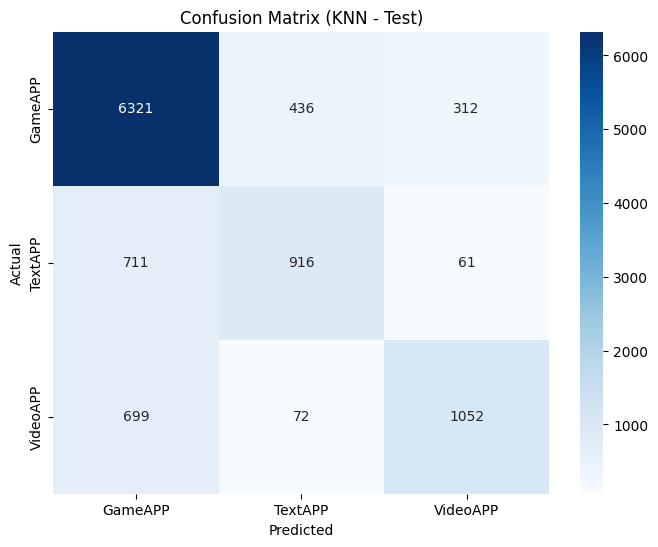


Comparison of Actual and Predicted Test Labels (KNN)
Actual,Predicted_KNN
VideoAPP,VideoAPP
GameAPP,TextAPP
GameAPP,GameAPP
GameAPP,VideoAPP
GameAPP,GameAPP
TextAPP,TextAPP
VideoAPP,GameAPP
TextAPP,TextAPP
GameAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,TextAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
VideoAPP,GameAPP
TextAPP,GameAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data, training labels, and test data from CSV files
train_data = pd.read_csv('Training_Data.csv', header=None)
train_labels = pd.read_csv('Training_Label.csv', header=None).values.ravel()
test_data = pd.read_csv('Test_Data.csv', header=None)

# Generate generic column names
num_columns = train_data.shape[1]
column_names = [f'Feature_{i}' for i in range(1, num_columns + 1)]

# Assign column names to the training data
train_data.columns = column_names

# Handle missing values by replacing them with NaN
train_data.replace(1.00000000000000e+99, np.nan, inplace=True)
test_data.replace(1.00000000000000e+99, np.nan, inplace=True)

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform training data
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=column_names)

# Transform test data and explicitly specify the columns
test_data = pd.DataFrame(imputer.transform(test_data), columns=column_names)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn_classifier.fit(train_data, train_labels)

# Make predictions on the test data
predictions_knn = knn_classifier.predict(test_data)

# Display confusion matrix for the classification prediction on training data
conf_matrix_knn_train = confusion_matrix(train_labels, knn_classifier.predict(train_data))
print("\n Confusion Matrix (KNN - Training):\n")
print(conf_matrix_knn_train)

# Calculate and print the accuracy on the training data as a percentage
train_predictions_knn = knn_classifier.predict(train_data)
accuracy_knn_train = accuracy_score(train_labels, train_predictions_knn)
accuracy_percentage_knn_train = accuracy_knn_train * 100
print("\nTraining Accuracy (KNN):", f"{accuracy_percentage_knn_train:.2f}%\n")

# Save the predictions to a CSV file
output_df_knn = pd.DataFrame(predictions_knn, columns=['Predictions'])
output_df_knn.to_csv('TestLabelPrediction_KNN.csv', index=False)

# Load the actual test labels for comparison
test_labels_actual_knn = pd.read_csv('Test_Labels_Actual.csv', header=None).values.ravel()

# Load the predictions from the KNN model
predictions_knn = pd.read_csv('TestLabelPrediction_KNN.csv')['Predictions']

# Compare predictions with actual test labels
comparison_knn = pd.DataFrame({'Actual': test_labels_actual_knn, 'Predicted_KNN': predictions_knn})

# Calculate accuracy for the KNN model
accuracy_knn = accuracy_score(test_labels_actual_knn, predictions_knn)

# Print accuracy rate
print("\nAccuracy Rate for KNN (Test):", f"{accuracy_knn * 100:.2f}%")

# Plot Confusion Matrix for test
conf_matrix_knn = confusion_matrix(test_labels_actual_knn, predictions_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels_actual_knn), yticklabels=np.unique(test_labels_actual_knn))
plt.title('Confusion Matrix (KNN - Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the comparison DataFrame to a CSV file
comparison_knn.to_csv('Comparison_KNN.csv', index=False)

# Now read and print the content of the output CSV file
with open('Comparison_KNN.csv', 'r') as file:
    file_content_knn = file.read()

print("\nComparison of Actual and Predicted Test Labels (KNN)")
print(file_content_knn)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(



 Confusion Matrix (Neural Network - Training):

[[26238   910  1072]
 [ 4381  2523    37]
 [ 3935    40  3181]]

Training Accuracy (Neural Network): 75.48%


Accuracy Rate for Neural Network (Test): 75.52%


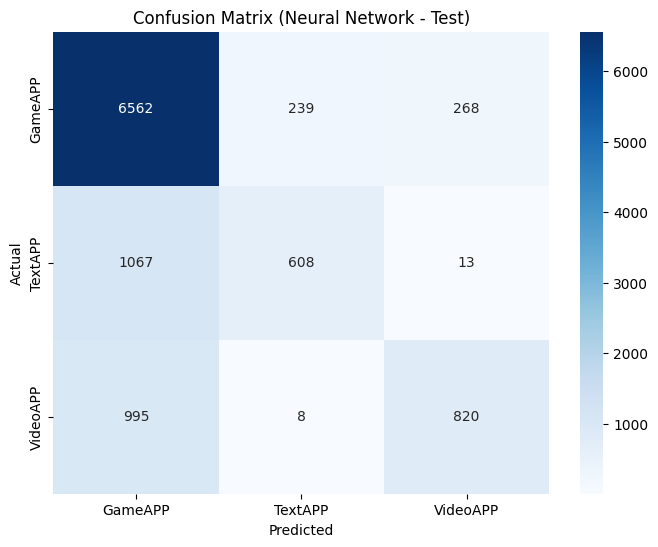


Comparison of Actual and Predicted Test Labels (Neural Network)
Actual,Predicted_NN
VideoAPP,GameAPP
GameAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,GameAPP
VideoAPP,GameAPP
TextAPP,GameAPP
GameAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
TextAPP,TextAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,TextAPP
VideoAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
TextAPP,GameAPP
GameAPP,GameAPP
VideoAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameAPP
GameAPP,GameAPP
VideoAPP,GameAPP
GameAPP,GameAPP
GameAPP,TextAPP
GameAPP,VideoAPP
TextAPP,TextAPP
GameAPP,GameAPP
VideoAPP,GameAPP
TextAPP,TextAPP
VideoAPP,VideoAPP
TextAPP,GameAPP
GameAPP,VideoAPP
GameAPP,GameAPP
GameAPP,GameA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data, training labels, and test data from CSV files
train_data = pd.read_csv('Training_Data.csv', header=None)
train_labels = pd.read_csv('Training_Label.csv', header=None).values.ravel()
test_data = pd.read_csv('Test_Data.csv', header=None)

# Generate generic column names
num_columns = train_data.shape[1]
column_names = [f'Feature_{i}' for i in range(1, num_columns + 1)]

# Assign column names to the training data
train_data.columns = column_names

# Handle missing values by replacing them with NaN
train_data.replace(1.00000000000000e+99, np.nan, inplace=True)
test_data.replace(1.00000000000000e+99, np.nan, inplace=True)

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform training data
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=column_names)

# Transform test data and explicitly specify the columns
test_data = pd.DataFrame(imputer.transform(test_data), columns=column_names)

# Create and train the Neural Network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
# You can adjust hidden_layer_sizes and other hyperparameters as needed

nn_classifier.fit(train_data, train_labels)

# Make predictions on the test data
predictions_nn = nn_classifier.predict(test_data)

# Display confusion matrix for the classification prediction on training data
conf_matrix_nn_train = confusion_matrix(train_labels, nn_classifier.predict(train_data))
print("\n Confusion Matrix (Neural Network - Training):\n")
print(conf_matrix_nn_train)

# Calculate and print the accuracy on the training data as a percentage
train_predictions_nn = nn_classifier.predict(train_data)
accuracy_nn_train = accuracy_score(train_labels, train_predictions_nn)
accuracy_percentage_nn_train = accuracy_nn_train * 100
print("\nTraining Accuracy (Neural Network):", f"{accuracy_percentage_nn_train:.2f}%\n")

# Save the predictions to a CSV file
output_df_nn = pd.DataFrame(predictions_nn, columns=['Predictions'])
output_df_nn.to_csv('TestLabelPrediction_NN.csv', index=False)

# Load the actual test labels for comparison
test_labels_actual_nn = pd.read_csv('Test_Labels_Actual.csv', header=None).values.ravel()

# Load the predictions from the Neural Network model
predictions_nn = pd.read_csv('TestLabelPrediction_NN.csv')['Predictions']

# Compare predictions with actual test labels
comparison_nn = pd.DataFrame({'Actual': test_labels_actual_nn, 'Predicted_NN': predictions_nn})

# Calculate accuracy for the Neural Network model
accuracy_nn = accuracy_score(test_labels_actual_nn, predictions_nn)

# Print accuracy rate
print("\nAccuracy Rate for Neural Network (Test):", f"{accuracy_nn * 100:.2f}%")

# Plot Confusion Matrix for test
conf_matrix_nn = confusion_matrix(test_labels_actual_nn, predictions_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels_actual_nn), yticklabels=np.unique(test_labels_actual_nn))
plt.title('Confusion Matrix (Neural Network - Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the comparison DataFrame to a CSV file
comparison_nn.to_csv('Comparison_NN.csv', index=False)

# Now read and print the content of the output CSV file
with open('Comparison_NN.csv', 'r') as file:
    file_content_nn = file.read()

print("\nComparison of Actual and Predicted Test Labels (Neural Network)")
print(file_content_nn)
